In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load your dataset
# Replace 'your_dataset.csv' with the actual file name
dataset = pd.read_excel('Final Data (2).xlsx')

# Extract features and target variable
features = ['CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP', 'Property Tax']
target_variable = 'Index_SA'

## LSTM





Epoch 1/50
8/8 - 5s - loss: 27748.8438 - val_loss: 89188.0391 - 5s/epoch - 635ms/step
Epoch 2/50
8/8 - 0s - loss: 27742.9961 - val_loss: 89171.8750 - 242ms/epoch - 30ms/step
Epoch 3/50
8/8 - 0s - loss: 27736.9277 - val_loss: 89153.9688 - 238ms/epoch - 30ms/step
Epoch 4/50
8/8 - 0s - loss: 27729.6035 - val_loss: 89132.9844 - 228ms/epoch - 28ms/step
Epoch 5/50
8/8 - 0s - loss: 27722.2891 - val_loss: 89107.3516 - 279ms/epoch - 35ms/step
Epoch 6/50
8/8 - 0s - loss: 27711.5020 - val_loss: 89074.1953 - 382ms/epoch - 48ms/step
Epoch 7/50
8/8 - 0s - loss: 27699.1055 - val_loss: 89030.4844 - 384ms/epoch - 48ms/step
Epoch 8/50
8/8 - 0s - loss: 27682.0156 - val_loss: 88971.8750 - 379ms/epoch - 47ms/step
Epoch 9/50
8/8 - 0s - loss: 27659.3262 - val_loss: 88889.6328 - 405ms/epoch - 51ms/step
Epoch 10/50
8/8 - 0s - loss: 27629.5840 - val_loss: 88766.2422 - 382ms/epoch - 48ms/step
Epoch 11/50
8/8 - 0s - loss: 27584.2285 - val_loss: 88570.1719 - 391ms/epoch - 49ms/step
Epoch 12/50
8/8 - 0s - loss: 275

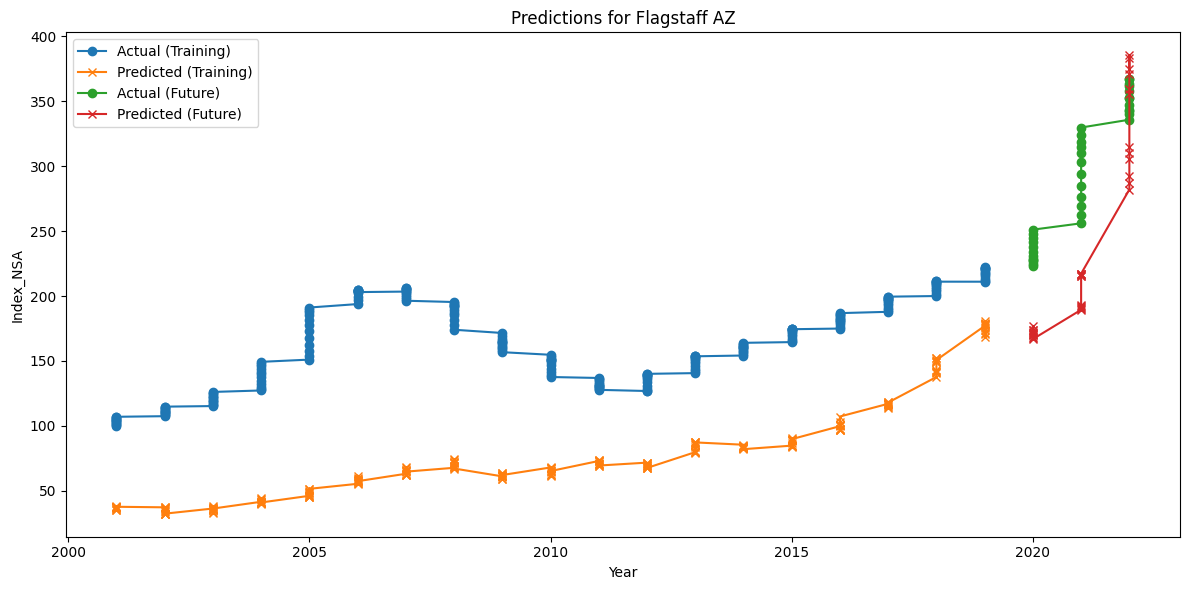

Epoch 1/50
8/8 - 5s - loss: 27807.2168 - val_loss: 97770.1641 - 5s/epoch - 637ms/step
Epoch 2/50
8/8 - 1s - loss: 27802.6055 - val_loss: 97757.0781 - 507ms/epoch - 63ms/step
Epoch 3/50
8/8 - 0s - loss: 27797.9238 - val_loss: 97742.9062 - 441ms/epoch - 55ms/step
Epoch 4/50
8/8 - 0s - loss: 27792.1113 - val_loss: 97725.2969 - 437ms/epoch - 55ms/step
Epoch 5/50
8/8 - 0s - loss: 27785.3691 - val_loss: 97704.4688 - 469ms/epoch - 59ms/step
Epoch 6/50
8/8 - 0s - loss: 27777.3965 - val_loss: 97677.9141 - 416ms/epoch - 52ms/step
Epoch 7/50
8/8 - 0s - loss: 27767.6426 - val_loss: 97643.8672 - 265ms/epoch - 33ms/step
Epoch 8/50
8/8 - 0s - loss: 27754.1250 - val_loss: 97598.9375 - 260ms/epoch - 32ms/step
Epoch 9/50
8/8 - 0s - loss: 27736.2129 - val_loss: 97536.7188 - 254ms/epoch - 32ms/step
Epoch 10/50
8/8 - 0s - loss: 27712.8438 - val_loss: 97447.0312 - 257ms/epoch - 32ms/step
Epoch 11/50
8/8 - 0s - loss: 27681.8750 - val_loss: 97310.5859 - 264ms/epoch - 33ms/step
Epoch 12/50
8/8 - 0s - loss: 276

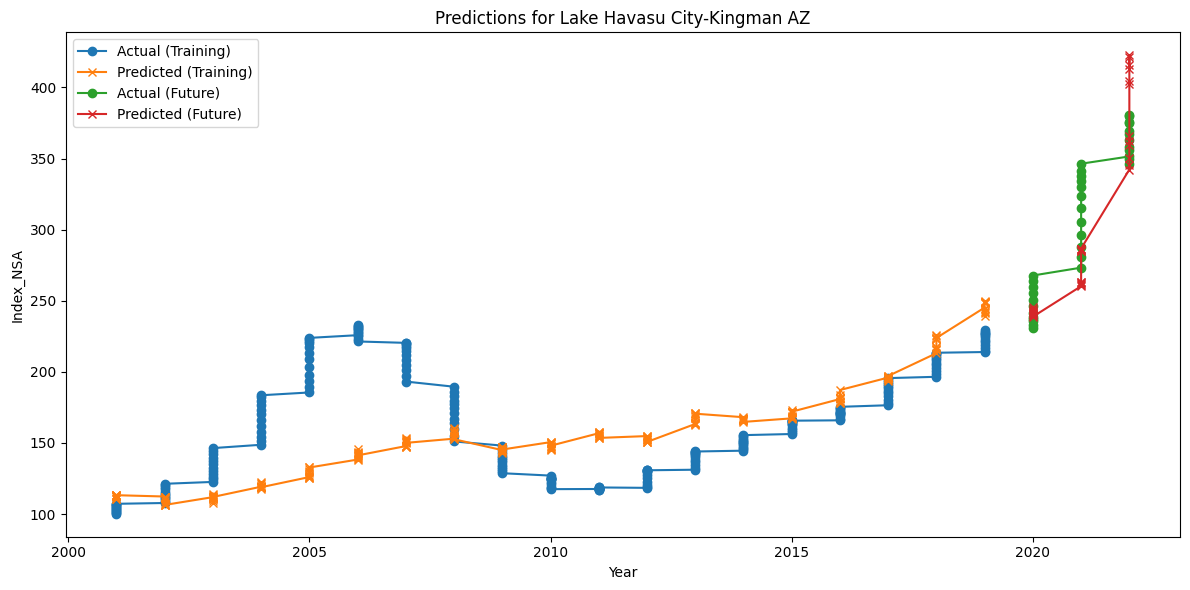

Epoch 1/50
8/8 - 3s - loss: 24436.1133 - val_loss: 92496.5312 - 3s/epoch - 423ms/step
Epoch 2/50
8/8 - 0s - loss: 24432.0918 - val_loss: 92484.8203 - 240ms/epoch - 30ms/step
Epoch 3/50
8/8 - 0s - loss: 24427.6934 - val_loss: 92471.6094 - 249ms/epoch - 31ms/step
Epoch 4/50
8/8 - 0s - loss: 24422.8281 - val_loss: 92455.7812 - 236ms/epoch - 29ms/step
Epoch 5/50
8/8 - 0s - loss: 24416.7930 - val_loss: 92435.5781 - 263ms/epoch - 33ms/step
Epoch 6/50
8/8 - 0s - loss: 24408.7461 - val_loss: 92408.1641 - 243ms/epoch - 30ms/step
Epoch 7/50
8/8 - 0s - loss: 24398.4277 - val_loss: 92370.9531 - 256ms/epoch - 32ms/step
Epoch 8/50
8/8 - 0s - loss: 24383.7305 - val_loss: 92319.8594 - 250ms/epoch - 31ms/step
Epoch 9/50
8/8 - 0s - loss: 24365.6484 - val_loss: 92248.7031 - 417ms/epoch - 52ms/step
Epoch 10/50
8/8 - 0s - loss: 24337.3438 - val_loss: 92145.0781 - 414ms/epoch - 52ms/step
Epoch 11/50
8/8 - 0s - loss: 24299.7520 - val_loss: 91983.4766 - 437ms/epoch - 55ms/step
Epoch 12/50
8/8 - 0s - loss: 242

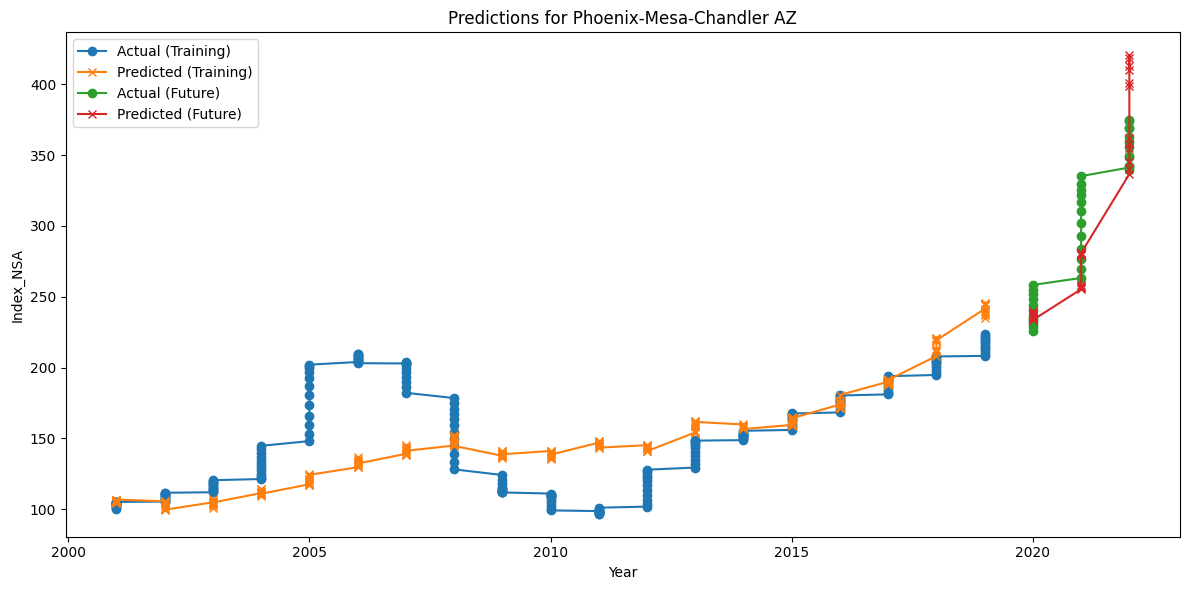

Epoch 1/50
8/8 - 5s - loss: 24043.1719 - val_loss: 82696.3906 - 5s/epoch - 582ms/step
Epoch 2/50
8/8 - 0s - loss: 24039.0586 - val_loss: 82684.5312 - 400ms/epoch - 50ms/step
Epoch 3/50
8/8 - 0s - loss: 24034.6055 - val_loss: 82671.6953 - 250ms/epoch - 31ms/step
Epoch 4/50
8/8 - 0s - loss: 24029.9414 - val_loss: 82656.4844 - 243ms/epoch - 30ms/step
Epoch 5/50
8/8 - 0s - loss: 24024.1797 - val_loss: 82637.4922 - 247ms/epoch - 31ms/step
Epoch 6/50
8/8 - 0s - loss: 24016.7480 - val_loss: 82613.6562 - 246ms/epoch - 31ms/step
Epoch 7/50
8/8 - 0s - loss: 24008.2383 - val_loss: 82583.1719 - 258ms/epoch - 32ms/step
Epoch 8/50
8/8 - 0s - loss: 23996.5176 - val_loss: 82542.4688 - 243ms/epoch - 30ms/step
Epoch 9/50
8/8 - 0s - loss: 23980.7871 - val_loss: 82484.6094 - 248ms/epoch - 31ms/step
Epoch 10/50
8/8 - 0s - loss: 23959.6992 - val_loss: 82397.8125 - 233ms/epoch - 29ms/step
Epoch 11/50
8/8 - 0s - loss: 23928.3398 - val_loss: 82259.5703 - 243ms/epoch - 30ms/step
Epoch 12/50
8/8 - 0s - loss: 238

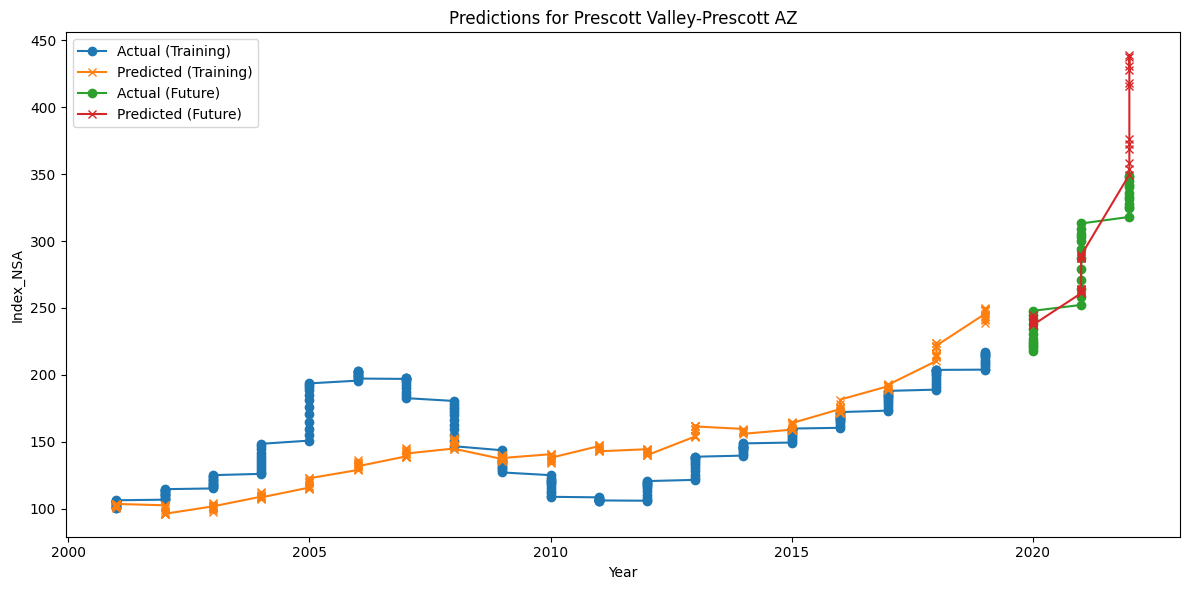

Epoch 1/50
8/8 - 3s - loss: 19766.1406 - val_loss: 43191.5586 - 3s/epoch - 406ms/step
Epoch 2/50
8/8 - 0s - loss: 19761.6016 - val_loss: 43182.2539 - 242ms/epoch - 30ms/step
Epoch 3/50
8/8 - 0s - loss: 19756.8730 - val_loss: 43172.2148 - 244ms/epoch - 30ms/step
Epoch 4/50
8/8 - 0s - loss: 19751.1406 - val_loss: 43160.2344 - 239ms/epoch - 30ms/step
Epoch 5/50
8/8 - 0s - loss: 19744.7188 - val_loss: 43145.6914 - 226ms/epoch - 28ms/step
Epoch 6/50
8/8 - 0s - loss: 19737.4863 - val_loss: 43127.0273 - 236ms/epoch - 30ms/step
Epoch 7/50
8/8 - 0s - loss: 19727.7422 - val_loss: 43103.0469 - 263ms/epoch - 33ms/step
Epoch 8/50
8/8 - 0s - loss: 19715.1328 - val_loss: 43070.9023 - 242ms/epoch - 30ms/step
Epoch 9/50
8/8 - 0s - loss: 19699.1055 - val_loss: 43026.1445 - 229ms/epoch - 29ms/step
Epoch 10/50
8/8 - 0s - loss: 19676.9629 - val_loss: 42961.0781 - 235ms/epoch - 29ms/step
Epoch 11/50
8/8 - 0s - loss: 19644.2871 - val_loss: 42862.3555 - 257ms/epoch - 32ms/step
Epoch 12/50
8/8 - 0s - loss: 195

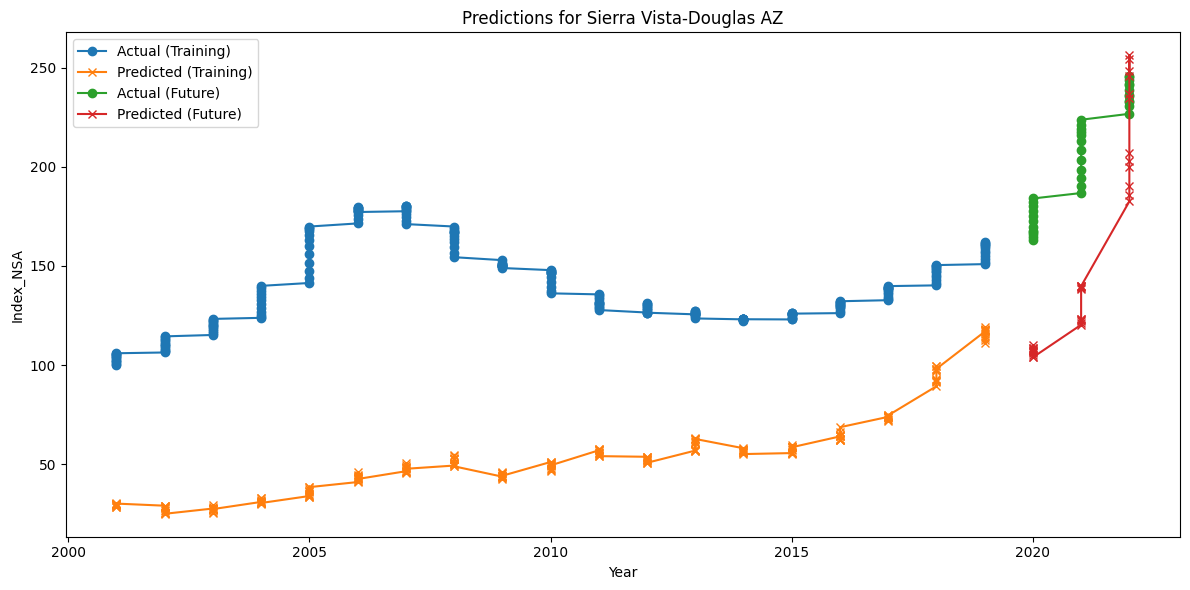

Epoch 1/50
8/8 - 3s - loss: 21241.7793 - val_loss: 58181.5820 - 3s/epoch - 416ms/step
Epoch 2/50
8/8 - 0s - loss: 21237.0410 - val_loss: 58168.3906 - 250ms/epoch - 31ms/step
Epoch 3/50
8/8 - 0s - loss: 21232.3242 - val_loss: 58155.0703 - 227ms/epoch - 28ms/step
Epoch 4/50
8/8 - 0s - loss: 21227.0566 - val_loss: 58141.0742 - 244ms/epoch - 30ms/step
Epoch 5/50
8/8 - 0s - loss: 21221.1836 - val_loss: 58124.7695 - 227ms/epoch - 28ms/step
Epoch 6/50
8/8 - 0s - loss: 21214.0859 - val_loss: 58104.9414 - 229ms/epoch - 29ms/step
Epoch 7/50
8/8 - 0s - loss: 21205.5156 - val_loss: 58079.3047 - 247ms/epoch - 31ms/step
Epoch 8/50
8/8 - 0s - loss: 21194.0859 - val_loss: 58044.5078 - 230ms/epoch - 29ms/step
Epoch 9/50
8/8 - 0s - loss: 21180.2012 - val_loss: 57996.3672 - 247ms/epoch - 31ms/step
Epoch 10/50
8/8 - 0s - loss: 21159.9922 - val_loss: 57926.4688 - 249ms/epoch - 31ms/step
Epoch 11/50
8/8 - 0s - loss: 21132.1406 - val_loss: 57817.8242 - 232ms/epoch - 29ms/step
Epoch 12/50
8/8 - 0s - loss: 210

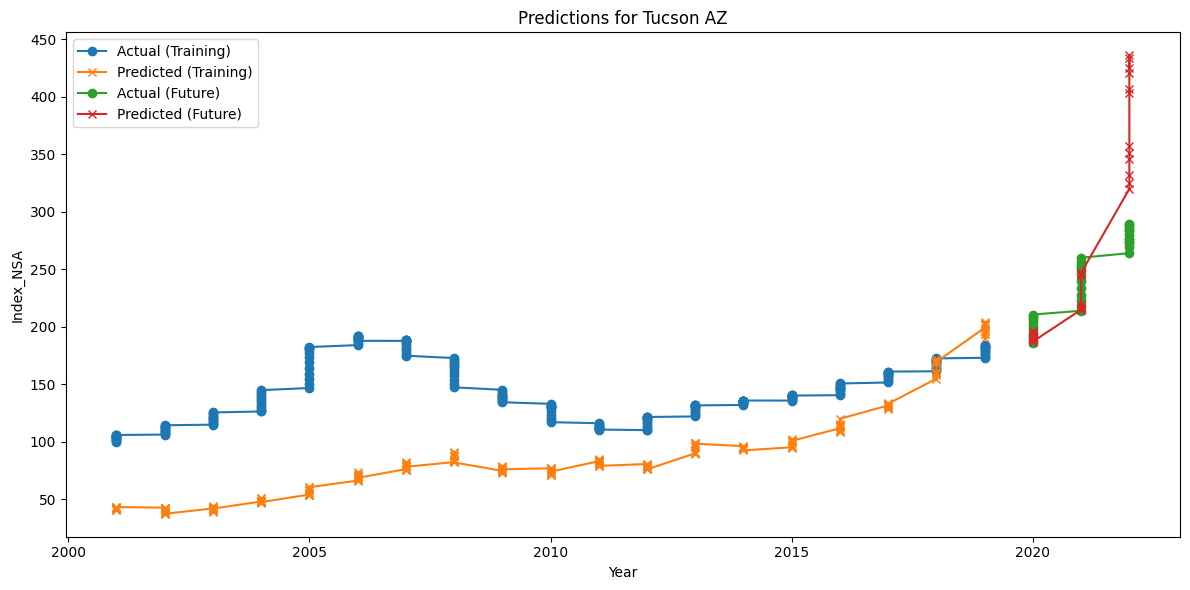

Epoch 1/50
8/8 - 3s - loss: 20386.4160 - val_loss: 48653.0234 - 3s/epoch - 416ms/step
Epoch 2/50
8/8 - 0s - loss: 20381.7539 - val_loss: 48642.4727 - 239ms/epoch - 30ms/step
Epoch 3/50
8/8 - 0s - loss: 20377.1074 - val_loss: 48632.3906 - 244ms/epoch - 31ms/step
Epoch 4/50
8/8 - 0s - loss: 20372.5234 - val_loss: 48622.0156 - 242ms/epoch - 30ms/step
Epoch 5/50
8/8 - 0s - loss: 20367.5527 - val_loss: 48609.4844 - 259ms/epoch - 32ms/step
Epoch 6/50
8/8 - 0s - loss: 20361.6621 - val_loss: 48594.3477 - 233ms/epoch - 29ms/step
Epoch 7/50
8/8 - 0s - loss: 20354.6016 - val_loss: 48575.1680 - 246ms/epoch - 31ms/step
Epoch 8/50
8/8 - 0s - loss: 20345.8945 - val_loss: 48550.5195 - 245ms/epoch - 31ms/step
Epoch 9/50
8/8 - 0s - loss: 20334.1035 - val_loss: 48517.1836 - 245ms/epoch - 31ms/step
Epoch 10/50
8/8 - 0s - loss: 20319.0254 - val_loss: 48469.9414 - 244ms/epoch - 30ms/step
Epoch 11/50
8/8 - 0s - loss: 20297.7578 - val_loss: 48401.0781 - 232ms/epoch - 29ms/step
Epoch 12/50
8/8 - 0s - loss: 202

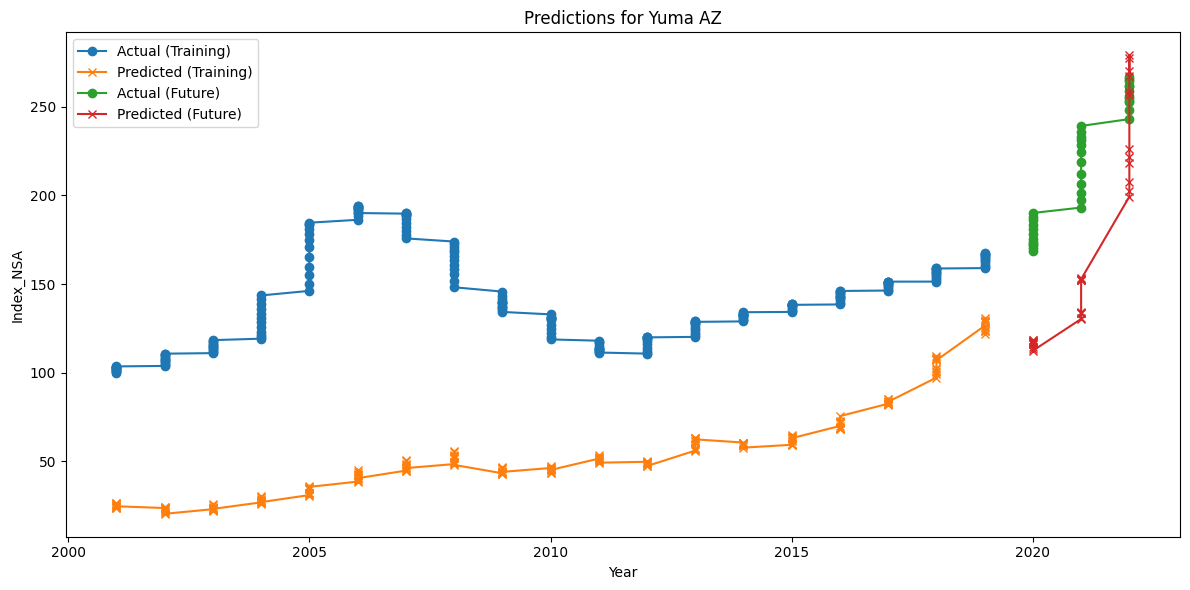

In [ ]:
# Assuming you have already loaded your dataset into 'dataset'
# Assuming you have already defined 'threshold' for accuracy calculation

# Get unique GEO_Names from the dataset
geo_names = dataset['GEO_Name'].unique()

# Define the threshold
threshold = 0.1

# Lists to accumulate all actual and predicted values
all_actual_values = []
all_predicted_values = []

# Loop through each GEO_Name
for geo_name in geo_names:
    # Filter data for the specific GEO_Name
    geo_data = dataset[dataset['GEO_Name'] == geo_name]

    # Check if there are samples for the current GEO_Name
    if geo_data.shape[0] == 0:
        print(f"No data found for {geo_name}. Skipping...")
        continue

    # Split data into training and validation sets
    training_data_geo = geo_data[geo_data['Year'] <= 2019]
    validation_future_data_geo = geo_data[(geo_data['Year'] > 2019) & (geo_data['Year'] <= 2022)]

    # Preprocess data - Normalize features
    scaler = MinMaxScaler()
    X_train_geo = scaler.fit_transform(training_data_geo[features])
    y_train_geo = training_data_geo[target_variable].values

    X_val_future_geo = scaler.transform(validation_future_data_geo[features])
    y_val_future_geo = validation_future_data_geo[target_variable].values

    # Replace NaN values with mean of the column
    X_train_geo = np.where(np.isnan(X_train_geo), np.nanmean(X_train_geo, axis=0), X_train_geo)
    X_val_future_geo = np.where(np.isnan(X_val_future_geo), np.nanmean(X_val_future_geo, axis=0), X_val_future_geo)
    y_train_geo = np.where(np.isnan(y_train_geo), np.nanmean(y_train_geo, axis=0), y_train_geo)
    y_val_future_geo = np.where(np.isnan(y_val_future_geo), np.nanmean(y_val_future_geo, axis=0), y_val_future_geo)

    # Set up the RNN model with increased complexity
    model_geo = Sequential()
    model_geo.add(LSTM(units=200, activation='relu', input_shape=(X_train_geo.shape[1], 1), return_sequences=True))
    model_geo.add(Dropout(0.2))  # Add dropout for regularization
    model_geo.add(LSTM(units=100, activation='relu'))
    model_geo.add(Dropout(0.2))  # Add dropout for regularization
    model_geo.add(Dense(units=1))

    # Compile the model with the specified learning rate
    model_geo.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

    # Train the model with increased patience for early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
    model_geo.fit(X_train_geo, y_train_geo, epochs=50, batch_size=32, validation_data=(X_val_future_geo, y_val_future_geo), callbacks=[early_stopping], verbose=2)

    # Make predictions for the training set
    train_predictions = model_geo.predict(X_train_geo)

    # Make predictions for the future values
    predictions_future_geo = model_geo.predict(X_val_future_geo)

    # Print or use the predictions_future_geo as needed
    print(f"Predictions for {geo_name}:")
    print(predictions_future_geo)

    mse = mean_squared_error(y_val_future_geo, predictions_future_geo)
    print(f"Mean Squared Error for {geo_name}: {mse}")

    rmse = sqrt(mse)
    print(f"Root Mean Squared Error for {geo_name}: {rmse}")

    # Evaluate the model using Mean Absolute Error
    mae = mean_absolute_error(y_val_future_geo, predictions_future_geo)
    print(f"Mean Absolute Error for {geo_name}: {mae}")

    # Evaluate the model using R-squared
    r2 = r2_score(y_val_future_geo, predictions_future_geo)
    print(f"R-squared for {geo_name}: {r2}")

    # Calculate accuracy for training set
    train_accuracy = np.mean(np.abs(train_predictions - y_train_geo) / y_train_geo <= threshold)
    print(f"Training Accuracy: {train_accuracy}")

    all_actual_values.extend(y_val_future_geo)
    all_predicted_values.extend(predictions_future_geo.flatten())

    # Plot training and future predictions on the same graph
    plt.figure(figsize=(12, 6))

    # Training Predictions
    plt.plot(training_data_geo['Year'], y_train_geo, label='Actual (Training)', marker='o')
    plt.plot(training_data_geo['Year'], train_predictions, label='Predicted (Training)', marker='x')

    # Future Predictions
    plt.plot(validation_future_data_geo['Year'], y_val_future_geo, label='Actual (Future)', marker='o')
    plt.plot(validation_future_data_geo['Year'], predictions_future_geo, label='Predicted (Future)', marker='x')

    plt.title(f'Predictions for {geo_name}')
    plt.xlabel('Year')
    plt.ylabel(target_variable)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{geo_name}_predictions_plot.png')  # Save the plot as an image file
    plt.show()

Epoch 1/50
47/47 - 2s - loss: 30901.5996 - val_loss: 27350.4141 - 2s/epoch - 46ms/step
Epoch 2/50
47/47 - 0s - loss: 30879.8398 - val_loss: 27322.5234 - 408ms/epoch - 9ms/step
Epoch 3/50
47/47 - 0s - loss: 30838.9199 - val_loss: 27260.3301 - 373ms/epoch - 8ms/step
Epoch 4/50
47/47 - 0s - loss: 30725.2148 - val_loss: 27039.7344 - 374ms/epoch - 8ms/step
Epoch 5/50
47/47 - 0s - loss: 29969.3027 - val_loss: 24349.5078 - 419ms/epoch - 9ms/step
Epoch 6/50
47/47 - 0s - loss: 16990.4258 - val_loss: 1548.7906 - 401ms/epoch - 9ms/step
Epoch 7/50
47/47 - 0s - loss: 1677.7727 - val_loss: 2267.4622 - 457ms/epoch - 10ms/step
Epoch 8/50
47/47 - 1s - loss: 1401.6661 - val_loss: 1925.1108 - 565ms/epoch - 12ms/step
Epoch 9/50
47/47 - 1s - loss: 1297.7029 - val_loss: 1747.2565 - 577ms/epoch - 12ms/step
Epoch 10/50
47/47 - 1s - loss: 1221.8379 - val_loss: 1837.7406 - 558ms/epoch - 12ms/step
Epoch 11/50
47/47 - 1s - loss: 1153.2214 - val_loss: 1517.8829 - 578ms/epoch - 12ms/step
Epoch 12/50
47/47 - 1s - lo

ValueError: ignored

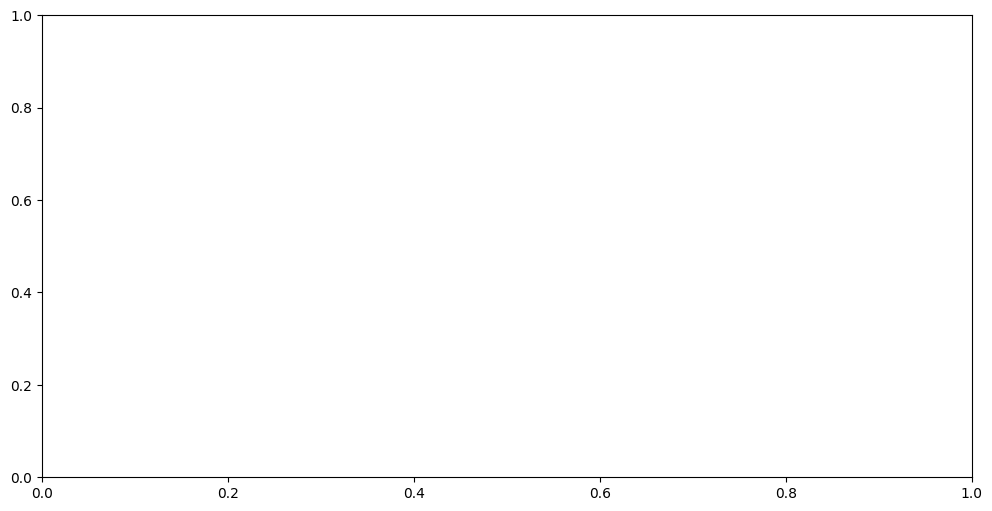

In [ ]:
# Extract features and target variable

# Preprocess data - Normalize features
scaler = MinMaxScaler()
dataset[features] = scaler.fit_transform(dataset[features])

# Extract input features and target variable
X = dataset[features].values
y = dataset[target_variable].values

# Handle NaN values
X = np.nan_to_num(X)
y = np.nan_to_num(y)

# Reshape X for LSTM
X = X.reshape((X.shape[0], X.shape[1], 1))

# Set up the RNN model
model = Sequential()
model.add(LSTM(units=100, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

# Train the model with increased patience for early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=2)

# Make predictions for the entire dataset
predictions = model.predict(X)

# Print or use the predictions as needed
print("Predictions for the entire dataset:")
print(predictions)

# Calculate Mean Squared Error (MSE)


rmse = sqrt(mse)
print(f"LSTM RMSE: {rmse}")

mse = mean_squared_error(y, predictions)
print(f"LSTM MSE: {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)
print(f"LSTM MAE: {mae}")

# Calculate R-squared
r2 = r2_score(y, predictions)
print(f"LSTM R2: {r2}")

# Assuming you have defined 'threshold' for accuracy calculation
threshold = 0.1

# Calculate accuracy
accuracy = np.mean(np.abs(predictions - y) / y <= threshold)
print(f"LSTM Accuracy: {accuracy}")

# Plot combined graph for all geographic regions
plt.figure(figsize=(12, 6))

# Actual and Predicted Values
plt.plot(validation_future_data_geo['Year'], all_actual_values, label='Actual (Combined)', marker='o')
plt.plot(validation_future_data_geo['Year'], all_predicted_values, label='Predicted (Combined)', marker='x')

plt.title('Combined Predictions for All Geographic Regions')
plt.xlabel('Year')
plt.ylabel(target_variable)
plt.legend()

# Save or show the combined plot
plt.tight_layout()
plt.savefig('combined_predictions_plot.png')  # Save the plot as an image file
plt.show()  # Show the plot

## SARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


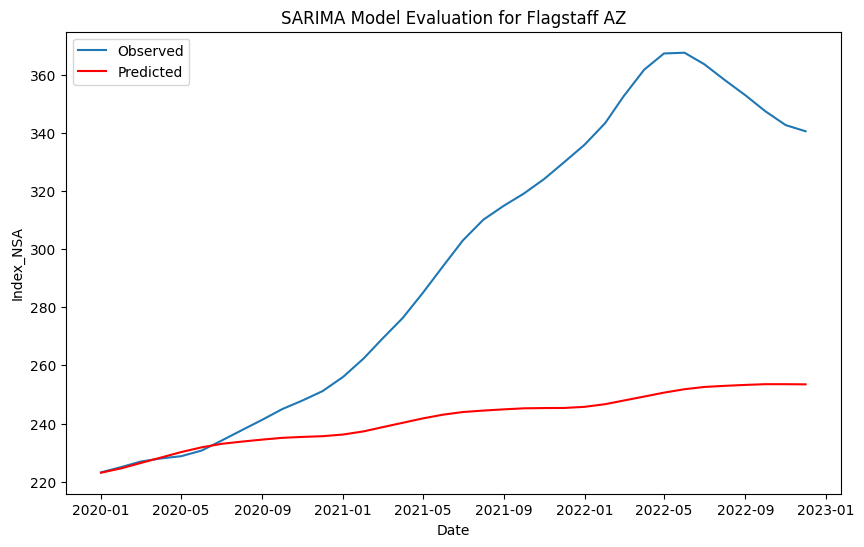

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


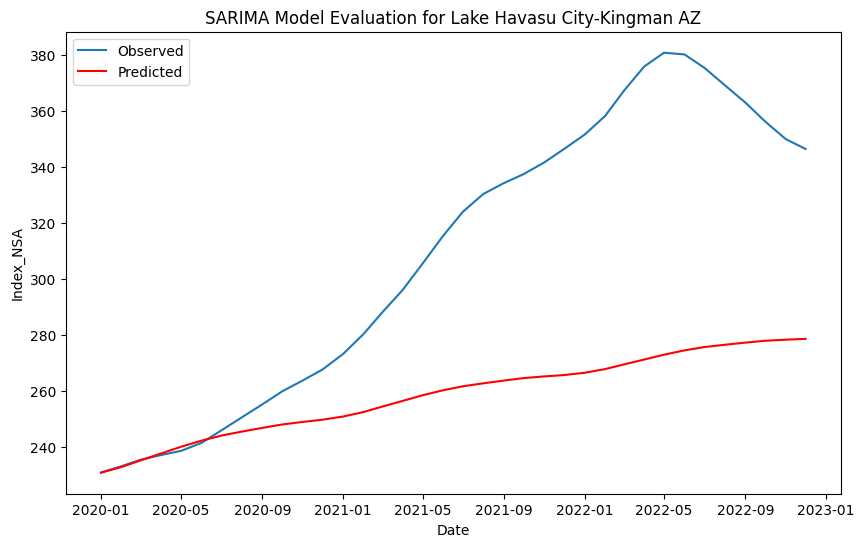

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


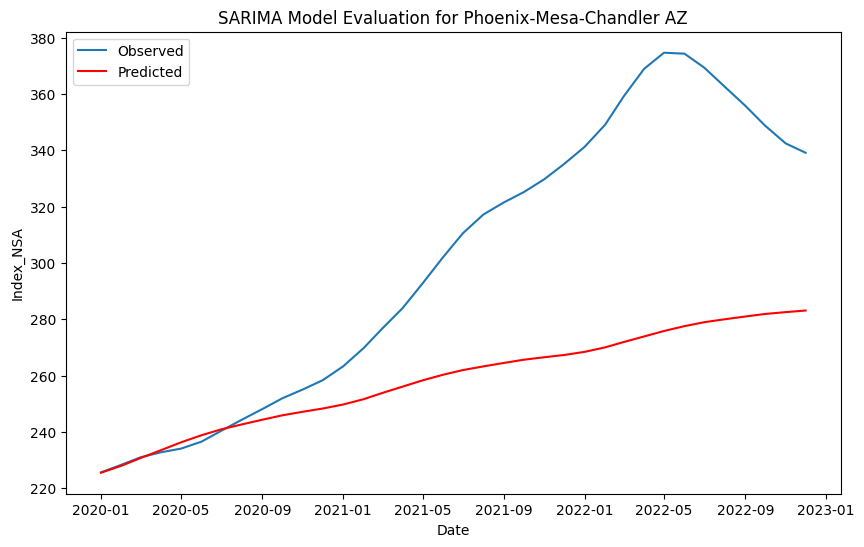

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


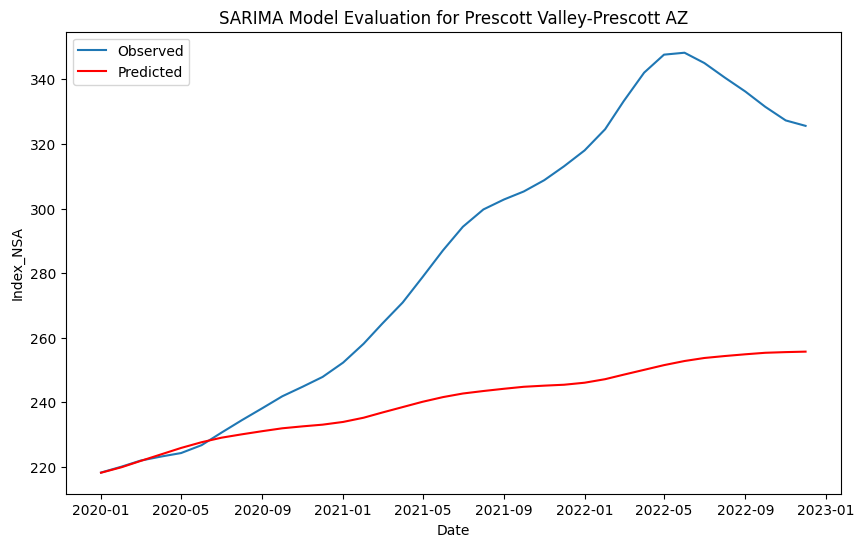

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


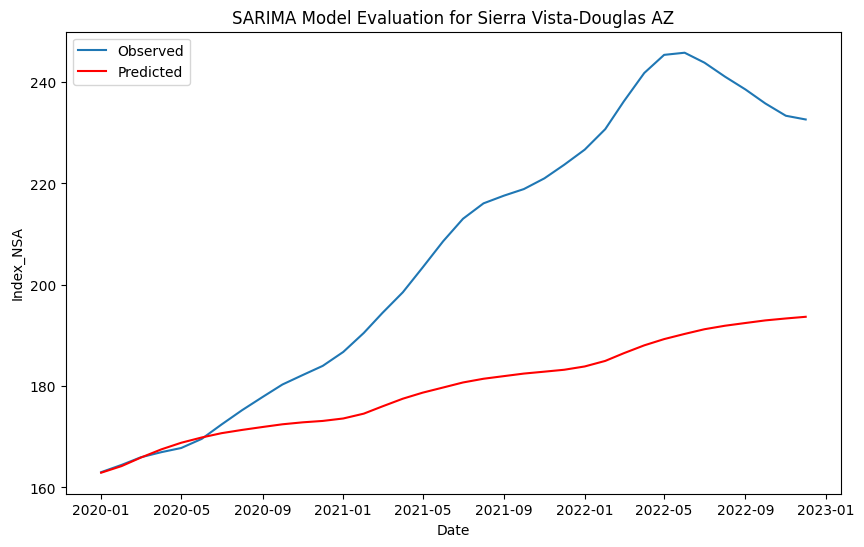

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


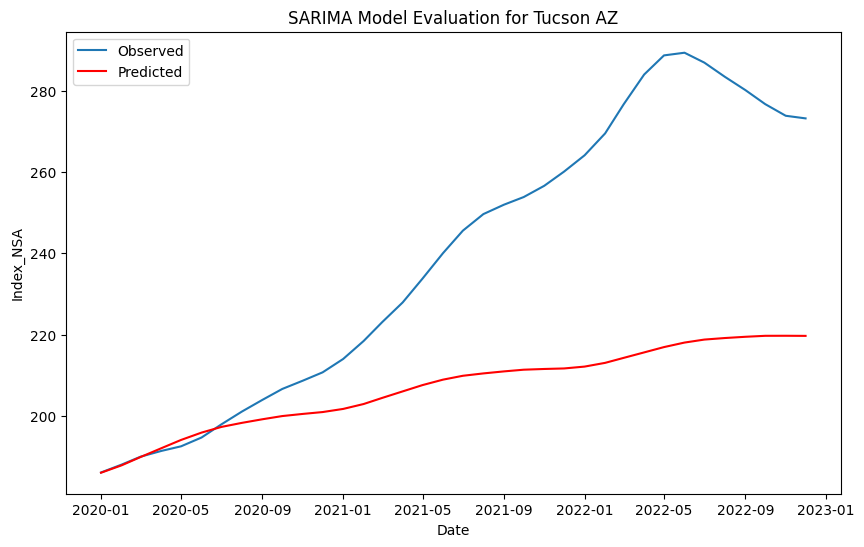

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


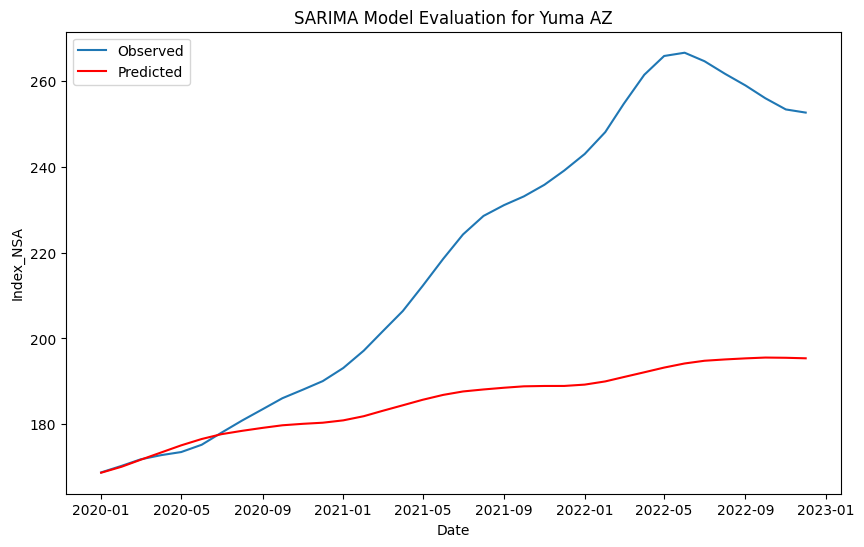

SARIMA RMSE: 42.11929759481705
SARIMA MSE for: 1774.035229880761
SARIMA MAE for: 32.98231501501993


In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Load your dataset
dataset = pd.read_excel('Final Data (2).xlsx')

# Create DateTime index
dataset['datetime'] = pd.to_datetime(dataset[['Year', 'Month']].assign(DAY=1))
dataset.set_index('datetime', inplace=True)

# Get unique GEO_Names from the dataset
geo_names = dataset['GEO_Name'].unique()

# Define SARIMA order and seasonal_order (you may need to tune these parameters)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Loop through each GEO_Name
for geo_name in geo_names:
    # Filter data for the specific GEO_Name
    geo_data = dataset[dataset['GEO_Name'] == geo_name]

    # Check if there are samples for the current GEO_Name
    if geo_data.shape[0] == 0:
        print(f"No data found for {geo_name}. Skipping...")
        continue

    # Filter columns and preprocess data
    model_data = geo_data[features + [target_variable]].dropna()

    # Split the data into training and validation sets
    train_data = model_data.loc[model_data.index <= '2019-12-31']
    validation_data = model_data.loc[(model_data.index > '2019-12-31') & (model_data.index <= '2022-12-31')]

    # Fit SARIMA model
    sarima_model = SARIMAX(train_data[target_variable], order=order, seasonal_order=seasonal_order)
    sarima_result = sarima_model.fit()

    # Make predictions
    start_date = validation_data.index[0]
    end_date = validation_data.index[-1]
    sarima_predictions = sarima_result.predict(start=len(train_data), end=len(train_data) + len(validation_data) - 1, dynamic=True)

    # Plot observed vs predicted values for each GEO_Name
    plt.figure(figsize=(10, 6))
    plt.plot(validation_data.index, validation_data[target_variable], label='Observed')
    plt.plot(validation_data.index, sarima_predictions, label='Predicted', color='red')
    plt.title(f"SARIMA Model Evaluation for {geo_name}")
    plt.xlabel("Date")
    plt.ylabel(target_variable)
    plt.legend()
    plot_filename = f"SARIMA_Plot_{geo_name}.png"
    plt.savefig(plot_filename)
    plt.show()

    # Evaluate SARIMA model
    rmse_sarima = sqrt(mean_squared_error(validation_data[target_variable], sarima_predictions))
    mse_sarima = mean_squared_error(validation_data[target_variable], sarima_predictions)
    mae_sarima = mean_absolute_error(validation_data[target_variable], sarima_predictions)

    # Print evaluation metrics for each GEO_Name
print(f"SARIMA RMSE: {rmse_sarima}")
print(f"SARIMA MSE for: {mse_sarima}")
print(f"SARIMA MAE for: {mae_sarima}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

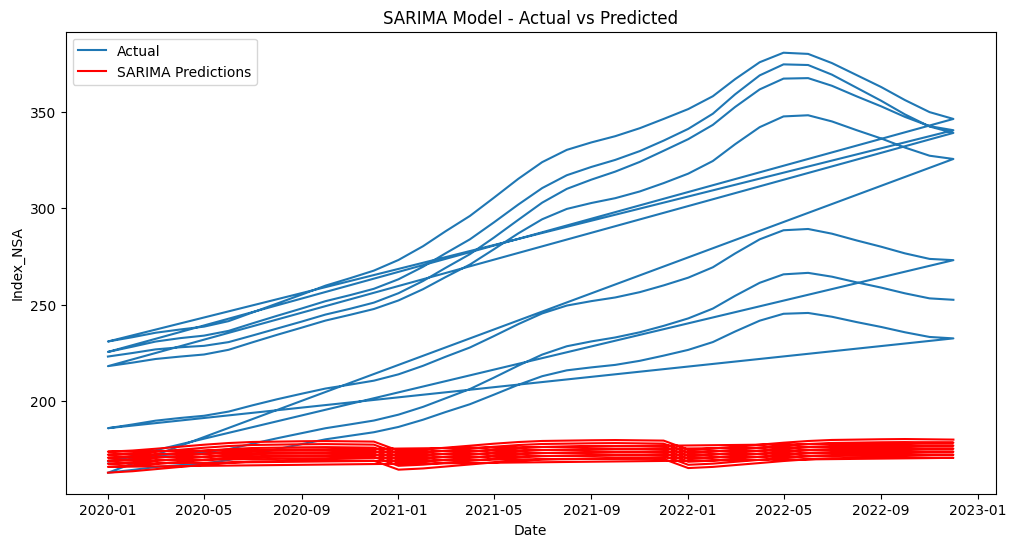

SARIMA RMSE: 108.48948133649064
SARIMA MSE: 11769.967560660752
SARIMA MAE: 91.37014107734156


In [ ]:
# Filter columns and preprocess data
model_data = dataset[features + [target_variable]].dropna()

# Convert date string to datetime object
date_threshold = pd.to_datetime('2019-12-31')

# Ensure the index is a datetime type
model_data.index = pd.to_datetime(model_data.index)

# Split the data into training and validation sets
train_data = model_data[model_data.index <= date_threshold]
validation_data = model_data[(model_data.index > date_threshold) & (model_data.index <= '2022-12-31')]

# Define SARIMA order and seasonal_order (you may need to tune these parameters)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Fit SARIMA model
sarima_model = SARIMAX(train_data[target_variable], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Make predictions
start_date = validation_data.index[0]
end_date = validation_data.index[-1]
sarima_predictions = sarima_result.predict(start=len(train_data), end=len(train_data) + len(validation_data) - 1, dynamic=True)

# Evaluate SARIMA model
rmse_sarima = sqrt(mean_squared_error(validation_data[target_variable], sarima_predictions))
mse_sarima = mean_squared_error(validation_data[target_variable], sarima_predictions)
mae_sarima = mean_absolute_error(validation_data[target_variable], sarima_predictions)

# Plotting actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(validation_data.index, validation_data[target_variable], label='Actual')
plt.plot(validation_data.index, sarima_predictions, label='SARIMA Predictions', color='red')
plt.title('SARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel(target_variable)
plt.legend()
plt.show()

# Print evaluation metrics
print(f"SARIMA RMSE: {rmse_sarima}")
print(f"SARIMA MSE: {mse_sarima}")
print(f"SARIMA MAE: {mae_sarima}")

## Prophet Model

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/0rnnat03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/lfh7c_5r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89645', 'data', 'file=/tmp/tmptpgee8p9/0rnnat03.json', 'init=/tmp/tmptpgee8p9/lfh7c_5r.json', 'output', 'file=/tmp/tmptpgee8p9/prophet_model4en5k6ck/prophet_model-20231204004723.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

MAE for Flagstaff AZ: 56.02230955124697
MSE for Flagstaff AZ: 4437.586651637986
RMSE for Flagstaff AZ: 66.61521336480118


00:47:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/0o2uk8jg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/yze8ib_b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11368', 'data', 'file=/tmp/tmptpgee8p9/0o2uk8jg.json', 'init=/tmp/tmptpgee8p9/yze8ib_b.json', 'output', 'file=/tmp/tmptpgee8p9/prophet_modeldbb33qm0/prophet_model-20231204004724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:24 - cmdstanpy - INFO - Chain [1] 

MAE for Lake Havasu City-Kingman AZ: 56.20478304209522
MSE for Lake Havasu City-Kingman AZ: 4088.9836638563993
RMSE for Lake Havasu City-Kingman AZ: 63.945161379547706


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/94s5apj7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/lh5e1kgx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46190', 'data', 'file=/tmp/tmptpgee8p9/94s5apj7.json', 'init=/tmp/tmptpgee8p9/lh5e1kgx.json', 'output', 'file=/tmp/tmptpgee8p9/prophet_modeldtzj9d0e/prophet_model-20231204004725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


MAE for Phoenix-Mesa-Chandler AZ: 103.4066375698334
MSE for Phoenix-Mesa-Chandler AZ: 11583.90891689687
RMSE for Phoenix-Mesa-Chandler AZ: 107.62856924114931


00:47:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/x1jj3gav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/5phspyea.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95141', 'data', 'file=/tmp/tmptpgee8p9/x1jj3gav.json', 'init=/tmp/tmptpgee8p9/5phspyea.json', 'output', 'file=/tmp/tmptpgee8p9/prophet_model5f0ongk4/prophet_model-20231204004725.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:25 - cmdstanpy - INFO - Chain [1] 

MAE for Prescott Valley-Prescott AZ: 43.107737904206324
MSE for Prescott Valley-Prescott AZ: 2469.7773558196923
RMSE for Prescott Valley-Prescott AZ: 49.69685458678137


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/n3uqo1se.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/9vaq_0u8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7591', 'data', 'file=/tmp/tmptpgee8p9/n3uqo1se.json', 'init=/tmp/tmptpgee8p9/9vaq_0u8.json', 'output', 'file=/tmp/tmptpgee8p9/prophet_modelrdik7n2l/prophet_model-20231204004726.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']


MAE for Sierra Vista-Douglas AZ: 26.59375842467907
MSE for Sierra Vista-Douglas AZ: 1034.8884121050119
RMSE for Sierra Vista-Douglas AZ: 32.16968156673317


00:47:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/gu71cdf3.json


MAE for Tucson AZ: 37.32485404343918
MSE for Tucson AZ: 1830.7269021949153
RMSE for Tucson AZ: 42.786994545012334


DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/ybi4r3wx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52142', 'data', 'file=/tmp/tmptpgee8p9/gu71cdf3.json', 'init=/tmp/tmptpgee8p9/ybi4r3wx.json', 'output', 'file=/tmp/tmptpgee8p9/prophet_modeltgxkz2ml/prophet_model-20231204004727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE for Yuma AZ: 33.17154396133251
MSE for Yuma AZ: 1633.5550381768617
RMSE for Yuma AZ: 40.41726163629671


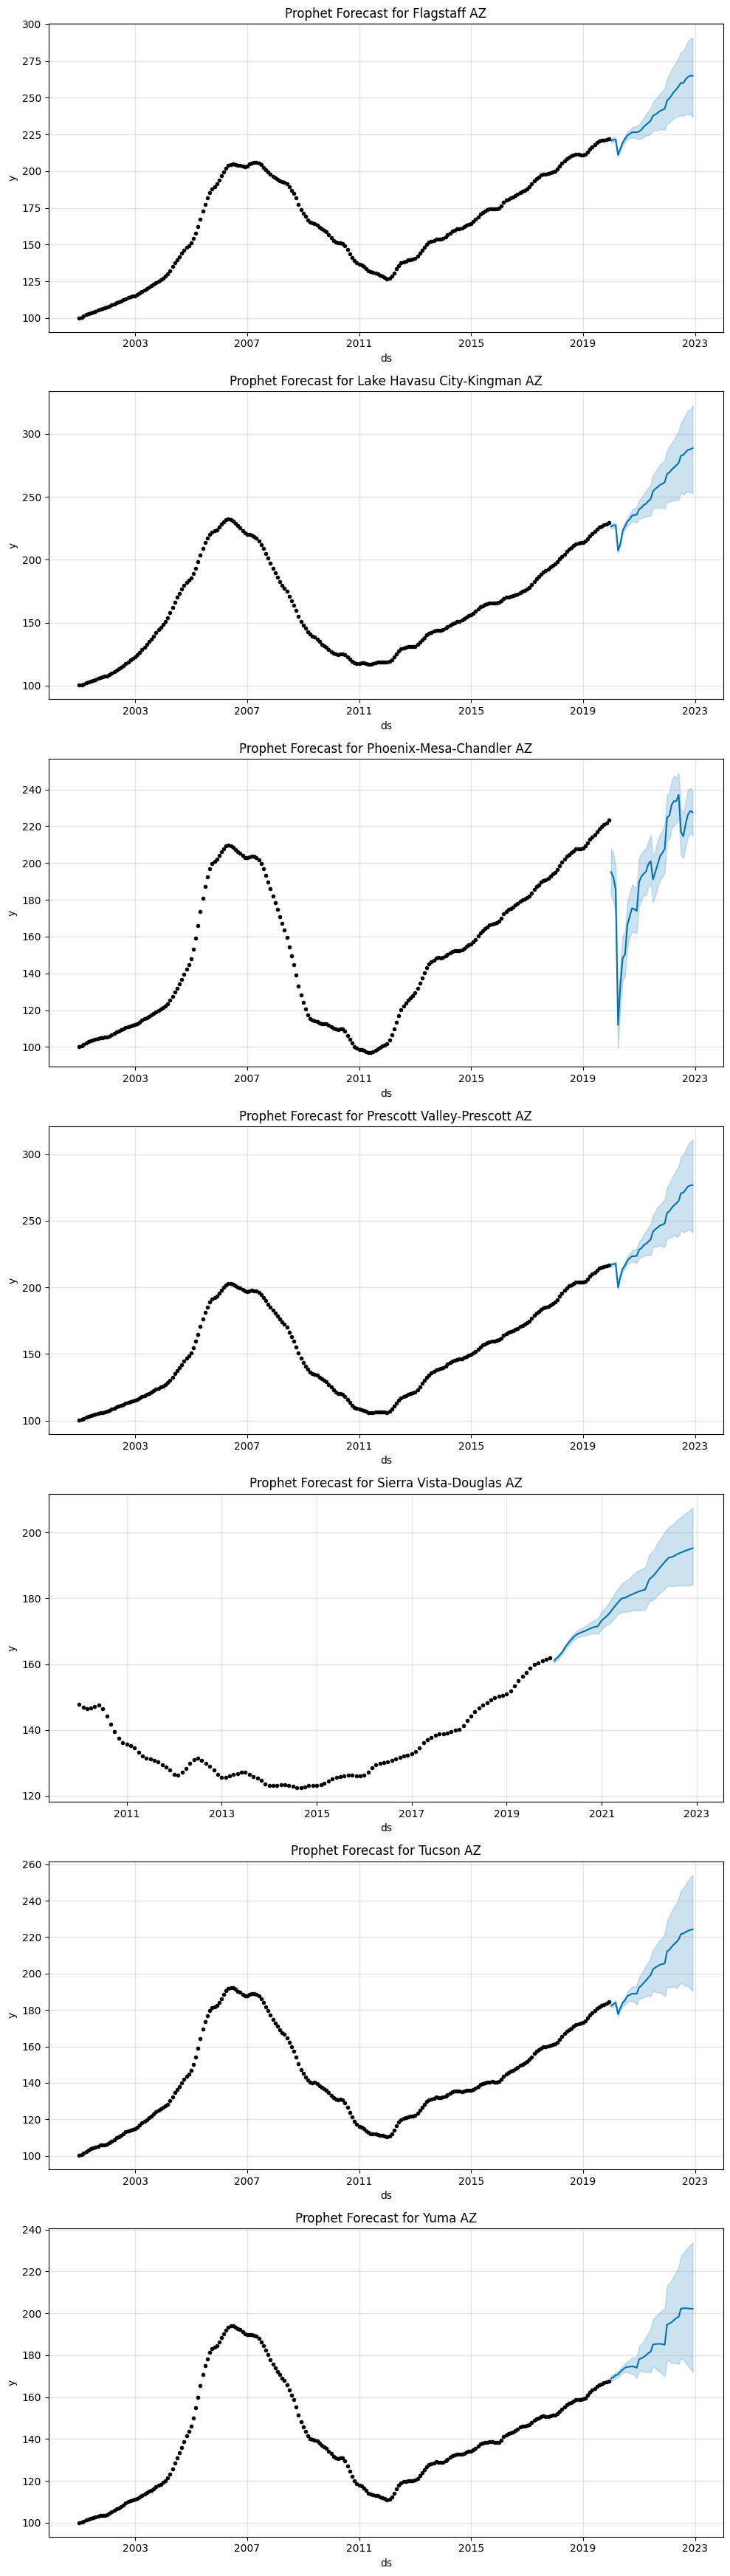

In [ ]:
# Load your dataset
df = pd.read_excel('Final Data (2).xlsx')

# Combine 'Year' and 'Month' columns into a single datetime column
df['ds'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Create a separate model for each GEO_Name
geo_names = df['GEO_Name'].unique()
models = {}

# Create a figure for subplots
fig, axs = plt.subplots(len(geo_names), 1, figsize=(10, 5 * len(geo_names)))

for i, geo_name in enumerate(geo_names):
    # Filter data for the current GEO_Name
    geo_data = df[df['GEO_Name'] == geo_name]

    # Handle missing values
    geo_data = geo_data.dropna(subset=['Population'])

    # Prepare the data for Prophet
    prophet_data = geo_data[['ds', 'Index_NSA', 'CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP', 'Property Tax']]
    prophet_data.columns = ['ds', 'y', 'CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP', 'Property Tax']

    # Split data into training and validation
    train_data = prophet_data[prophet_data['ds'] < '2020-01-01']
    valid_data = prophet_data[prophet_data['ds'] >= '2020-01-01']

    # Create and fit the Prophet model
    model = Prophet()
    model.add_regressor('CPI')
    model.add_regressor('Median Income')
    model.add_regressor('MORTGAGE')
    model.add_regressor('Population')
    model.add_regressor('Unemployment Rate')
    model.add_regressor('GDP')
    model.add_regressor('Property Tax')

    model.fit(train_data)

    # Make predictions on the validation set
    forecast = model.predict(valid_data.drop(columns='y'))

    # Store the model for later use
    models[geo_name] = model

    # Calculate and print accuracy metrics
    mae = mean_absolute_error(valid_data['y'], forecast['yhat'])
    mse = mean_squared_error(valid_data['y'], forecast['yhat'])
    rmse = sqrt(mse)

    print(f"MAE for {geo_name}: {mae}")
    print(f"MSE for {geo_name}: {mse}")
    print(f"RMSE for {geo_name}: {rmse}")

    # Plot the predictions
    ax = axs[i]
    model.plot(forecast, ax=ax)
    ax.set_title(f'Prophet Forecast for {geo_name}')

# Adjust layout for better spacing
plt.tight_layout()

# Save the combined image
plt.savefig('prophet_forecasts_combined.png')

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/2gd9irmp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptpgee8p9/ow41bzjz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84805', 'data', 'file=/tmp/tmptpgee8p9/2gd9irmp.json', 'init=/tmp/tmptpgee8p9/ow41bzjz.json', 'output', 'file=/tmp/tmptpgee8p9/prophet_modelnpin7ip5/prophet_model-20231204022539.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:25:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:25:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet RMSE: 88.72826621799615
Prophet MSE: 7872.705226051596
Prophet MAE: 69.87116842932862


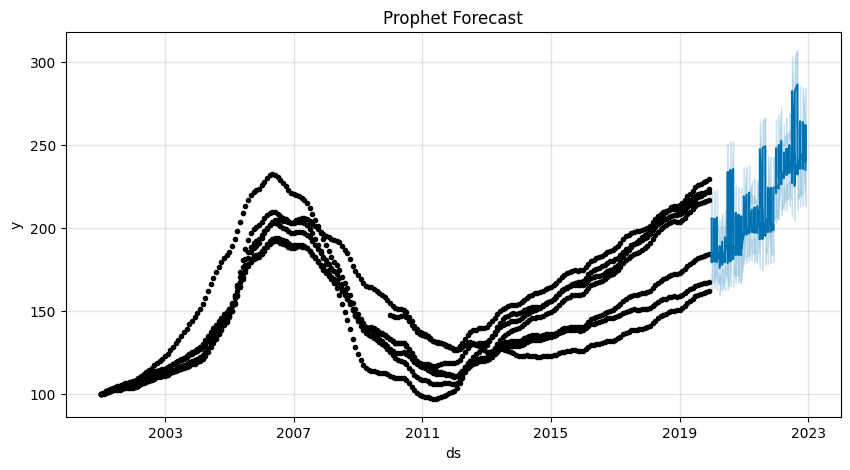

In [ ]:
# Load your dataset
df = pd.read_excel('Final Data (2).xlsx')

# Combine 'Year' and 'Month' columns into a single datetime column
df['ds'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Handle missing values
df = df.dropna(subset=['Population'])

# Prepare the data for Prophet
prophet_data = df[['ds', 'Index_NSA', 'CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP', 'Property Tax']]
prophet_data.columns = ['ds', 'y', 'CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP', 'Property Tax']

# Split data into training and validation
train_data = prophet_data[prophet_data['ds'] < '2020-01-01']
valid_data = prophet_data[prophet_data['ds'] >= '2020-01-01']

# Create and fit the Prophet model
model = Prophet()
model.add_regressor('CPI')
model.add_regressor('Median Income')
model.add_regressor('MORTGAGE')
model.add_regressor('Population')
model.add_regressor('Unemployment Rate')
model.add_regressor('GDP')
model.add_regressor('Property Tax')

model.fit(train_data)

# Make predictions on the validation set
forecast = model.predict(valid_data.drop(columns='y'))

# Calculate and print accuracy metrics
mae = mean_absolute_error(valid_data['y'], forecast['yhat'])
mse = mean_squared_error(valid_data['y'], forecast['yhat'])
rmse = sqrt(mse)

print(f"Prophet RMSE: {rmse}")
print(f"Prophet MSE: {mse}")
print(f"Prophet MAE: {mae}")

# Plot the predictions
fig, ax = plt.subplots(figsize=(10, 5))
model.plot(forecast, ax=ax)
ax.set_title('Prophet Forecast')

# Save the image
plt.savefig('prophet_forecast.png')


## XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Get unique GEO_Names from the dataset
geo_names = dataset['GEO_Name'].unique()

# Loop through each GEO_Name
for geo_name in geo_names:
    # Filter data for the specific GEO_Name
    geo_data = dataset[dataset['GEO_Name'] == geo_name]

    # Check if there are samples for the current GEO_Name
    if geo_data.shape[0] == 0:
        print(f"No data found for {geo_name}. Skipping...")
        continue

    # Split data into training and validation sets
    training_data_geo = geo_data[geo_data['Year'] <= 2019]
    validation_future_data_geo = geo_data[(geo_data['Year'] > 2019) & (geo_data['Year'] <= 2022)]

    # Extract features and target variable
    features = ['CPI', 'Median Income', 'MORTGAGE', 'Population', 'Unemployment Rate', 'GDP']
    target_variable = 'Index_NSA'

    # Preprocess data
    scaler = MinMaxScaler()
    X_train_geo = scaler.fit_transform(training_data_geo[features])
    y_train_geo = training_data_geo[target_variable].values

    X_val_future_geo = scaler.transform(validation_future_data_geo[features])
    y_val_future_geo = validation_future_data_geo[target_variable].values

    # Create XGBoost regressor
    model_geo = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                                 max_depth = 5, alpha = 10, n_estimators = 50)

    # Train the XGBoost model
    model_geo.fit(X_train_geo, y_train_geo)

    # Make predictions for the future values
    predictions_future_geo = model_geo.predict(X_val_future_geo)

    # Print or use the predictions_future_geo as needed
    print(f"Predictions for {geo_name}:")
    print(predictions_future_geo)

    # Evaluate the model using Mean Squared Error
    mse = mean_squared_error(y_val_future_geo, predictions_future_geo)
    print(f"Mean Squared Error for {geo_name}: {mse}")

    # Evaluate the model using Mean Absolute Error
    mae = mean_absolute_error(y_val_future_geo, predictions_future_geo)
    print(f"Mean Absolute Error for {geo_name}: {mae}")

    # Evaluate the model using R-squared
    r2 = r2_score(y_val_future_geo, predictions_future_geo)
    print(f"R-squared for {geo_name}: {r2}")


Predictions for Flagstaff AZ:
[210.38637 208.19995 207.59108 202.99231 202.99231 202.99231 202.99231
 193.69727 196.32518 204.35335 204.35335 200.68988 191.55418 194.55843
 199.58235 200.21684 200.39363 199.58235 199.11346 198.14351 202.84824
 202.30447 208.35147 208.35147 209.0499  216.83961 214.4608  217.95718
 207.30347 203.5141  204.0357  210.82501 209.55162 196.83075 222.69322
 221.92317]
Mean Squared Error for Flagstaff AZ: 10278.282530548171
Mean Absolute Error for Flagstaff AZ: 89.41823413463
R-squared for Flagstaff AZ: -2.998501924189054
Predictions for Lake Havasu City-Kingman AZ:
[221.02606 210.14476 206.9414  190.54616 190.54616 187.26869 191.38931
 196.54303 197.69849 203.71469 204.51855 203.71469 208.29507 209.09894
 209.9952  209.9952  218.18602 209.9952  218.18602 209.50552 201.25862
 206.64154 218.9918  218.9918  213.16228 228.2666  220.78064 217.19554
 217.19554 205.4532  205.4532  198.8724  211.8131  195.21255 234.87227
 228.88922]
Mean Squared Error for Lake Havasu 